## 4. Throughput for Writes (90 pts)

In [1]:
%load_ext autoreload
%autoreload 2

from queries import query_mw as q_mw
from queries import query_client as q_client
from queries import exp_filter
from queries import network as q_net

from plots.ctrl import generate, dashboard_nc, dashboard_time, export
from plots import tp, rt, utilization, queue, ilaw, sst

suite={
    "exp41":"simulation_p2",
    "exp41ext":"simulation_p2"
}

output_folder = "result"

### 4.1 Full System

In [2]:
exp_name="exp41"
df_exp41_mw = q_mw.load_df(suite=suite[exp_name], exp=exp_name)
df_exp41_mw = exp_filter.filter_df_nc_w(df=df_exp41_mw, filter_dict=exp_filter.exp41)

df_exp41_client = q_client.load_df(suite=suite[exp_name], exp=exp_name)
df_exp41_client = exp_filter.filter_df_nc_w(df=df_exp41_client, filter_dict=exp_filter.exp41)


In [3]:
df_piv, df = ilaw.interactive_law_mix(df_client=df_exp41_client, df_mw=df_exp41_mw)

display(df_piv)
table = ilaw.table(df_piv, wo_col_count=10, ro_col_count=0)
print(table)

display(q_net.stats(suite=suite[exp_name], exp="exp41"))

rt_ilaw_diff_wo                                               \
num_clients                 6    12   24   48   72   96   144  192  288  384   
n_worker_per_mw                                                                
8                          -0.1  0.0  0.0  0.1  0.1  0.4  0.7  1.0  1.6  1.8   
16                         -0.1 -0.1  0.0  0.0  0.1  0.2  0.4  0.7  1.0  2.7   
32                         -0.1 -0.1  0.0  0.0  0.0  0.1  0.2  0.4  0.7  0.5   
64                         -0.1 -0.1  0.0  0.0  0.1  0.1  0.2  0.3  0.3  0.9   

                rt_ilaw_diff_ro                                      
num_clients                 6   12  24  48  72  96  144 192 288 384  
n_worker_per_mw                                                      
8                             -   -   -   -   -   -   -   -   -   -  
16                            -   -   -   -   -   -   -   -   -   -  
32                            -   -   -   -   -   -   -   -   -   -  
64                            -   -   -   -   -   -   -   -   -   -

\begin{tabular}{|cr|*{10}{r}|}
\cline{3-12}
\multicolumn{2}{c|}{} & \multicolumn{10}{c|}{number of clients} \Tstrut\\
\multicolumn{2}{c|}{} & 6 & 12 & 24 & 48 & 72 & 96 & 144 & 192 & 288 & 384 \\
\hline
\parbox[t]{2mm}{\multirow{4}{*}{\rotatebox[origin=c]{90}{worker}}} & 8 & -0.1 & 0.0 & 0.0 & 0.1 & 0.1 & 0.4 & 0.7 & 1.0 & 1.6 & 1.8\Tstrut\\
& 16 & -0.1 & -0.1 & 0.0 & 0.0 & 0.1 & 0.2 & 0.4 & 0.7 & 1.0 & 2.7 \\
& 32 & -0.1 & -0.1 & 0.0 & 0.0 & 0.0 & 0.1 & 0.2 & 0.4 & 0.7 & 0.5 \\
& 64 & -0.1 & -0.1 & 0.0 & 0.0 & 0.1 & 0.1 & 0.2 & 0.3 & 0.3 & 0.9 \\
& & \multicolumn{10}{c|}{in milliseconds} \\
\hline
\multicolumn{2}{c}{} & \multicolumn{10}{c}{write-only} \Tstrut\\ 
\end{tabular}


[{'from': 'Client1', 'to': 'Middleware1', 'bandwidth': 108.0, 'rtt': 1.357},
 {'from': 'Client1', 'to': 'Middleware2', 'bandwidth': 92.7, 'rtt': 1.238},
 {'from': 'Client2', 'to': 'Middleware1', 'bandwidth': 103.5, 'rtt': 1.852},
 {'from': 'Client2',
  'to': 'Middleware2',
  'bandwidth': 96.80000000000001,
  'rtt': 1.358},
 {'from': 'Client3', 'to': 'Middleware1', 'bandwidth': 95.1, 'rtt': 1.145},
 {'from': 'Client3', 'to': 'Middleware2', 'bandwidth': 105.0, 'rtt': 1.067},
 {'from': 'Middleware1', 'to': 'Client1', 'bandwidth': 338.5, 'rtt': 1.353},
 {'from': 'Middleware1', 'to': 'Client2', 'bandwidth': 222.5, 'rtt': 1.662},
 {'from': 'Middleware1', 'to': 'Client3', 'bandwidth': 257.5, 'rtt': 0.954},
 {'from': 'Middleware2', 'to': 'Client1', 'bandwidth': 413.0, 'rtt': 1.31},
 {'from': 'Middleware2', 'to': 'Client2', 'bandwidth': 185.5, 'rtt': 1.46},
 {'from': 'Middleware2', 'to': 'Client3', 'bandwidth': 208.0, 'rtt': 0.911},
 {'from': 'Middleware1', 'to': 'Server1', 'bandwidth': 216.0, 

#### Write-Only

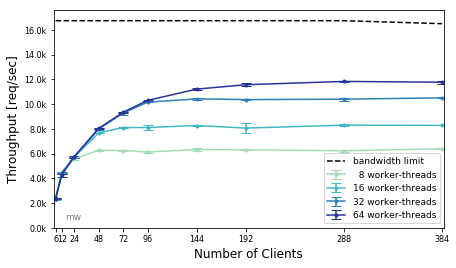

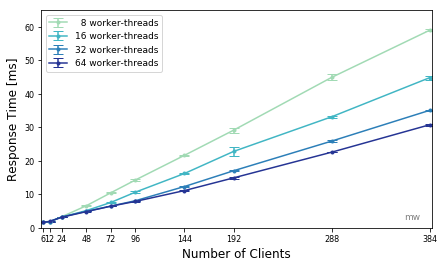

Saved Data: ./../../data/exp41/write_only/processed_mw.log
Saved Data: ./../../data/exp41/write_only/processed_client.log


In [4]:
generate(tp.nc_w, df_exp41_mw, output_folder, f"{exp_name}_wo_tp_nc_w") 
generate(rt.nc_w, df_exp41_mw, output_folder, f"{exp_name}_wo_rt_nc_w")

export(df_exp41_mw, "write_only", exp_name="exp41", suffix="_mw")
export(df_exp41_client, "write_only", exp_name="exp41", suffix="_client")

MW: 


n_worker_per_mw          8                                                   \
num_clients             6       12      24      48      72      96      144   
throughput_rep_mean  2358.0  4520.0  5561.9  6262.2  6242.4  6126.4  6319.7   
tp_ilaw              2002.4  3852.5  5175.1  6057.0  6102.4  6148.4  6265.6   
rt_rep_mean             1.7     1.8     3.3     6.6    10.5    14.3    21.6   
qwt_rep_mean            0.1     0.1     0.7     4.0     7.9    11.6    19.1   
queue_rep_mean          0.1     0.3     2.0    12.4    24.4    36.1    59.8   
wtt_rep_mean            1.6     1.7     2.6     2.6     2.6     2.6     2.5   
sst_rep_mean            1.1     1.2     1.5     1.6     1.6     1.6     1.6   
sstmax_rep_mean         1.2     1.3     2.0     2.0     2.0     2.0     1.9   
sst0_rep_mean           1.1     1.1     1.2     1.3     1.4     1.5     1.5   
sst1_rep_mean           1.0     1.1     2.0     2.0     2.0     1.9     1.9   
sst2_rep_mean           1.2     1.3     1.4     1.5     1.5     1.5     1.5   

n_worker_per_mw                                  16                          \
num_clients             192     288     384     6       12      24      48    
throughput_rep_mean  6294.1  6226.2  6384.4  2314.5  4336.1  5698.5  7664.2   
tp_ilaw              6299.0  6224.7  6362.1  1956.9  3735.8  5299.7  7416.4   
rt_rep_mean            29.1    44.9    59.0     1.7     1.9     3.2     5.1   
qwt_rep_mean           26.6    42.3    56.5     0.1     0.1     0.2     1.3   
queue_rep_mean         84.0   131.9   179.5     0.0     0.1     0.2     5.3   
wtt_rep_mean            2.5     2.6     2.5     1.6     1.8     3.0     3.9   
sst_rep_mean            1.6     1.6     1.6     1.1     1.2     1.7     2.2   
sstmax_rep_mean         1.9     2.0     1.9     1.3     1.3     2.3     3.1   
sst0_rep_mean           1.5     1.5     1.4     1.1     1.2     1.5     1.8   
sst1_rep_mean           1.9     2.0     1.9     1.0     1.1     2.3     3.1   
sst2_rep_mean           1.5     1.5     1.5     1.3     1.3     1.4     1.7   

n_worker_per_mw                                                          32  \
num_clients             72      96      144     192     288     384     6     
throughput_rep_mean  8102.4  8102.3  8263.6  8057.3  8293.7  8277.0  2385.1   
tp_ilaw              8081.0  8010.9  8202.8  7953.5  8349.0  8315.2  2014.0   
rt_rep_mean             7.6    10.6    16.2    22.8    33.2    44.9     1.6   
qwt_rep_mean            3.6     6.7    12.3    18.8    29.3    41.0     0.1   
queue_rep_mean         15.2    27.8    50.5    74.3   119.9   171.0     0.1   
wtt_rep_mean            3.9     4.0     3.9     4.0     3.9     3.9     1.5   
sst_rep_mean            2.3     2.3     2.3     2.3     2.3     2.3     1.1   
sstmax_rep_mean         3.2     3.2     3.1     3.3     3.2     3.2     1.2   
sst0_rep_mean           1.9     1.9     1.8     2.1     1.7     1.8     1.0   
sst1_rep_mean           3.2     3.2     3.1     3.1     3.2     3.2     1.0   
sst2_rep_mean           1.9     1.9     1.9     1.9     1.9     1.9     1.2   

n_worker_per_mw                                                        \
num_clients             12      24      48      72       96       144   
throughput_rep_mean  4456.3  5707.4  7974.9  9266.5  10154.0  10418.0   
tp_ilaw              3809.9  5242.8  7676.8  9207.2  10186.1  10537.7   
rt_rep_mean             1.8     3.2     4.9     6.5      8.1     12.3   
qwt_rep_mean            0.1     0.2     0.4     0.9      2.1      6.2   
queue_rep_mean          0.2     0.4     1.5     4.4     10.9     33.1   
wtt_rep_mean            1.7     3.0     4.5     5.6      5.9      6.1   
sst_rep_mean            1.2     1.8     2.5     3.1      3.5      3.6   
sstmax_rep_mean         1.3     2.5     3.7     4.8      5.0      5.2   
sst0_rep_mean           1.1     1.4     2.0     2.4      2.8      2.9   
sst1_rep_mean           1.1     2.5     3.7     4.8      5.0      5.2   
sst2_rep_mean           1.3     1.4     

Client: 


n_worker_per_mw          8                                                   \
num_clients             6       12      24      48      72      96      144   
throughput_rep_mean  2326.5  4459.1  5574.1  6389.3  6290.4  6315.4  6535.7   
rt_rep_mean             2.6     2.7     4.3     7.5    11.5    15.2    22.1   

n_worker_per_mw                                  16                          \
num_clients             192     288     384     6       12      24      48    
throughput_rep_mean  6512.8  6454.8  6221.7  2274.8  4274.7  5694.4  7709.7   
rt_rep_mean            29.5    44.6    58.3     2.7     2.8     4.2     6.2   

n_worker_per_mw                                                          32  \
num_clients             72      96      144     192     288     384     6     
throughput_rep_mean  8249.6  8252.6  8479.9  8335.1  8538.1  8268.1  2327.8   
rt_rep_mean             8.8    11.7    17.0    23.1    33.8    43.7     2.6   

n_worker_per_mw                                                        \
num_clients             12      24      48      72       96       144   
throughput_rep_mean  4381.1  5722.7  8049.1  9313.8  10241.9  10563.5   
rt_rep_mean             2.8     4.2     6.0     7.7      9.4     13.6   

n_worker_per_mw                                     64                  \
num_clients              192      288      384     6       12      24    
throughput_rep_mean  10598.1  10665.9  10662.7  2330.9  4224.0  5740.2   
rt_rep_mean             18.1     27.0     36.0     2.6     2.9     4.2   

n_worker_per_mw                                                          \
num_clients             48      72       96       144      192      288   
throughput_rep_mean  8077.8  9472.1  10437.2  11391.0  11787.4  11984.4   
rt_rep_mean             6.0     7.6      9.2     12.7     16.3     24.1   

n_worker_per_mw               
num_clients              384  
throughput_rep_mean  12082.9  
rt_rep_mean             31.8

Number of Worker: 8


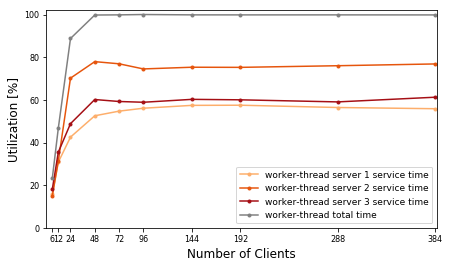

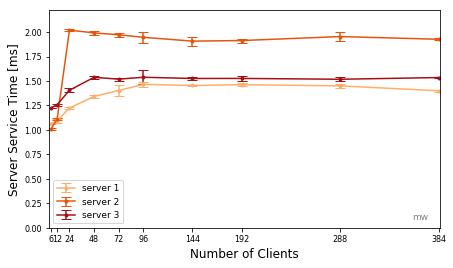

Number of Worker: 16


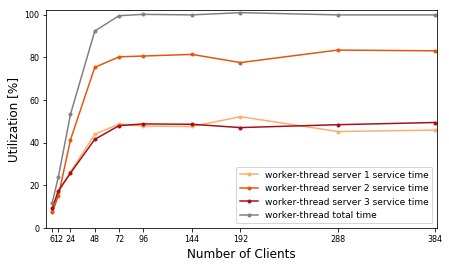

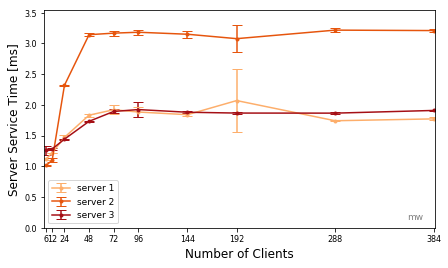

Number of Worker: 32


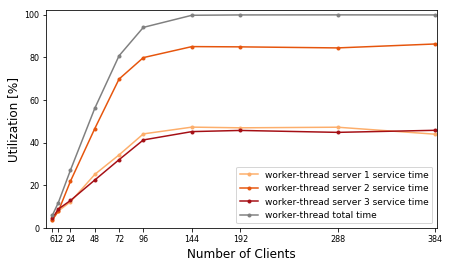

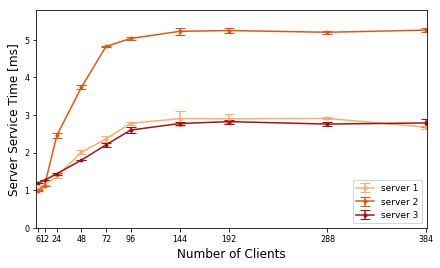

Number of Worker: 64


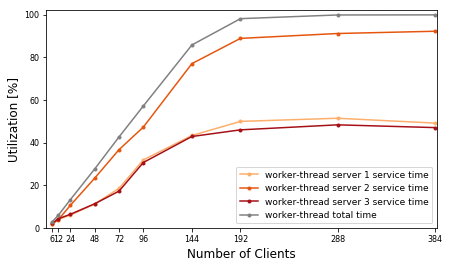

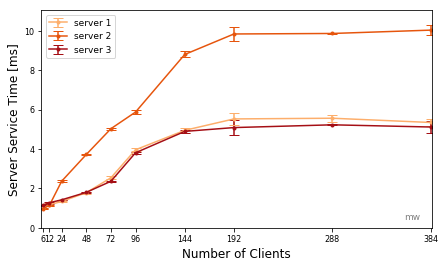

In [5]:
print("MW: ")

df_exp41_mw['tp_ilaw'] = 1000 * df_exp41_mw.apply(lambda row: row['num_clients'] / (row['rt_rep_mean']+row['client_rtt']), axis=1)

df = df_exp41_mw[['n_worker_per_mw', 'num_clients', 'throughput_rep_mean','tp_ilaw', 'rt_rep_mean', 'qwt_rep_mean', 'queue_rep_mean', 'wtt_rep_mean', 'sst_rep_mean', 'sstmax_rep_mean', 'sst0_rep_mean', 'sst1_rep_mean', 'sst2_rep_mean']].sort_values(['n_worker_per_mw', 'num_clients']).set_index(['n_worker_per_mw','num_clients']).transpose().round(1)


display(df)


print("Client: ")
display(df_exp41_client[['n_worker_per_mw', 'num_clients', 'throughput_rep_mean','rt_rep_mean']].sort_values(['n_worker_per_mw', 'num_clients']).set_index(['n_worker_per_mw','num_clients']).transpose().round(1))


#df = rt_decomposition(df_client=df_exp41_client, df_mw=df_exp41_mw)
for n_worker in [8, 16, 32, 64]:
    print(f"Number of Worker: {n_worker}")
    generate(utilization.detail_nc, df_exp41_mw[df_exp41_mw['n_worker_per_mw']==n_worker], output_folder, f"{exp_name}_util_nc_w{n_worker}")
    generate(sst.detail_nc, df_exp41_mw[df_exp41_mw['n_worker_per_mw']==n_worker], output_folder, f"{exp_name}_sst_detail_nc_w{n_worker}")

#### 4.1.1 Explanation

### 4.2 Summary